In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix


%matplotlib inline

c:\Users\SKRZEP\Desktop\MNIST\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


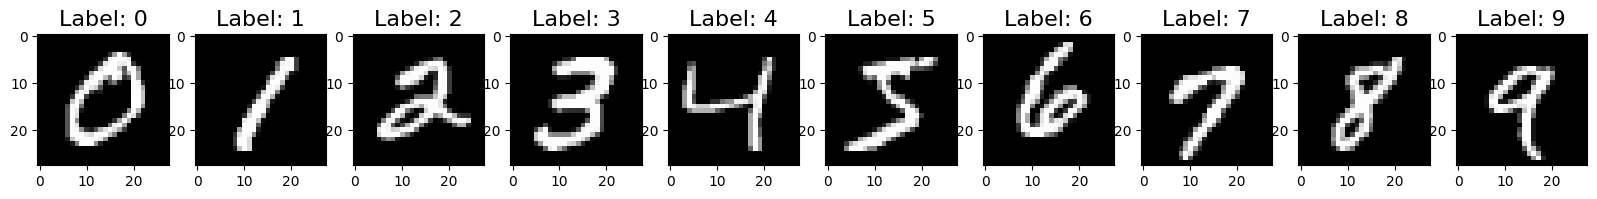

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Obrabianie danych:

In [7]:
#Normalize Data
x_train = x_train /255.0
x_test = x_test/255.0

In [8]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [9]:
# MODEL

model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

c:\Users\SKRZEP\Desktop\MNIST\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train

In [10]:
batch_size = 512
epochs= 30
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8240 - loss: 0.6127
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9314 - loss: 0.2318
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9494 - loss: 0.1705
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9599 - loss: 0.1370
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9675 - loss: 0.1115
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9710 - loss: 0.0981
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9747 - loss: 0.0824
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.0722
Epoch 9/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9806 - loss: 0.0640
Epoch 10/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9828 - loss: 0.0552
Epoch 11/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9851 - loss: 0.0497
Epoch 12/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

EVALUATE

In [11]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("TEST LOSS: {}, TEST ACCCURACY: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9782 - loss: 0.0830
TEST LOSS: 0.08296503871679306, TEST ACCCURACY: 0.9782000184059143


In [12]:
y_prep = model.predict(x_test)
y_prep_classes = np.argmax(y_prep, axis=1)
print(y_prep)
print(y_prep_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
[[5.5480481e-08 2.3936237e-09 8.3892864e-08 ... 9.9999309e-01
  1.8374706e-07 6.4558453e-06]
 [1.8965504e-10 1.4255564e-06 9.9999857e-01 ... 1.0046567e-13
  5.2008892e-10 2.5121984e-19]
 [3.0891172e-11 9.9999928e-01 4.2971891e-08 ... 3.4858641e-07
  9.4833439e-09 2.8434352e-11]
 ...
 [2.8197998e-17 3.4277897e-13 2.2018923e-17 ... 1.2635801e-09
  1.2840140e-10 3.9173978e-10]
 [1.4552873e-13 2.3354615e-11 5.8217014e-16 ... 1.0098222e-13
  1.8140392e-08 5.0614001e-15]
 [9.7125707e-10 1.4211790e-14 2.0288483e-11 ... 7.9801048e-20
  9.4413789e-11 8.5220181e-14]]
[7 2 1 ... 4 5 6]


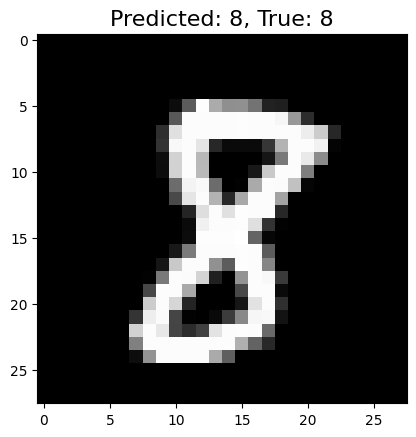

In [13]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_prep_class = y_prep_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_prep_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

Text(0.5, 1.0, 'Confusion Matrix')

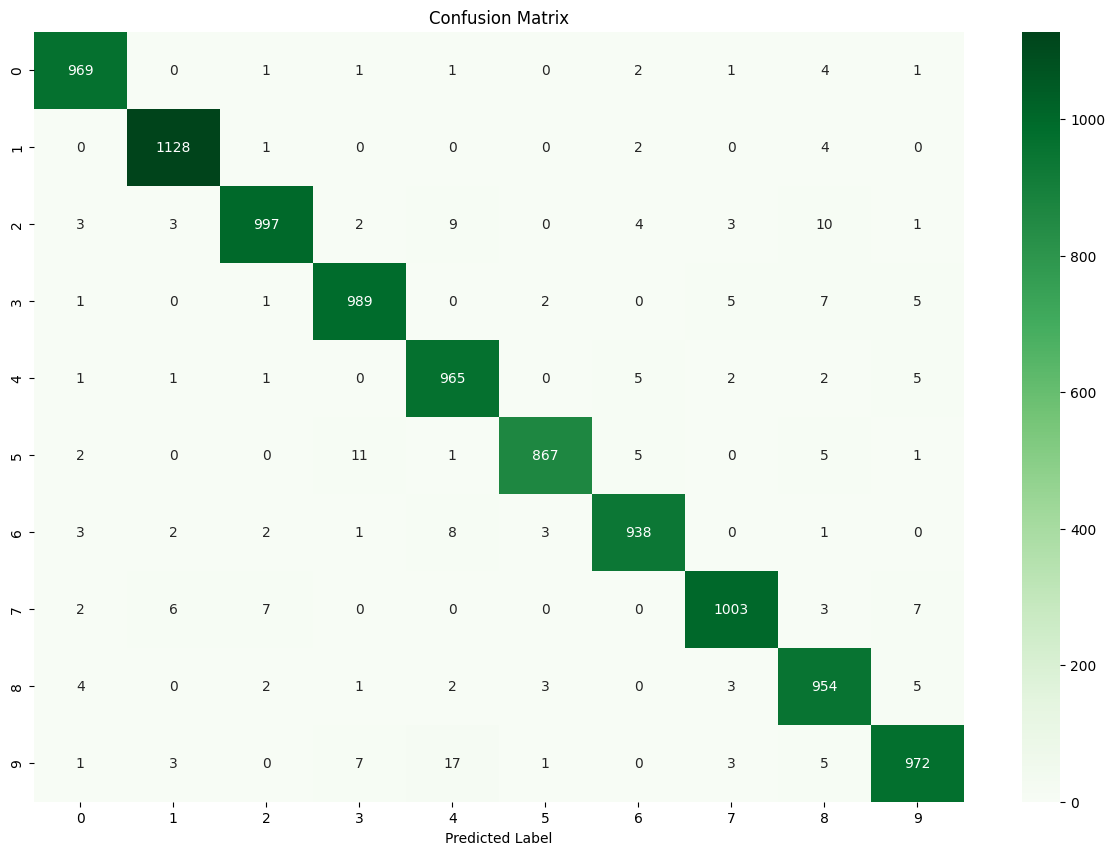

In [14]:
# Confusion Matrix

confusion_mtx = confusion_matrix(y_true, y_prep_classes)

#plot
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Greens')
ax.set_xlabel('Predicted Label')
ax.set_title('Confusion Matrix')
